In [ ]:
latitude = 	17
longitude = 78

### **DETECTION OF LOCATION **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data_df= pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/market_yard_data.csv")
data_df.head()
del data_df['capacity']
del data_df['name']
data_df.head()

,district,latitude,longitude
0,Ranga Reddy,17.333267,78.288869
1,Ranga Reddy,17.451972,78.132948
2,Ranga Reddy,17.310470,78.139780
3,Ranga Reddy,17.041282,78.200179
4,Ranga Reddy,17.188829,78.646914


In [ ]:
district=(data_df['district'].unique())
x=(len(district))
print(x)
for i in range(x):
  print(district[i])

29
Ranga Reddy
Vikarabad  
Malkajgiri (Medchal) 
Mahabubnagar 
Nagarkurnool
Wanaparthy 
Gadwal (Jogulamba)
Nalgonda 
Suryapet 
Yadadri 
Warangal Urban 
Warangal Rural 
Mahabubabad 
Jaishankar(Bhoopalapalli)  
Jangaon  
Karimnagar 
Jagityal 
Sircilla 
Peddapally 
Khammam 
Kothagudem 
Kamareddy 
Adilabad 
Mancherial 
Komram Bheem at Asifabad 
Nirmal 
Medak 
Sangareddy 
Siddipet 


In [ ]:
data_df.describe()

,latitude,longitude
count,309.000000,309.000000
mean,17.845711,78.753705
std,0.909595,0.766514
min,15.918589,77.326090
25%,17.211038,78.132169
50%,17.898006,78.630810
75%,18.496962,79.341487
max,19.727541,80.896252


In [ ]:
pd.DataFrame(data_df.isna().sum())

,0
district,0
latitude,55
longitude,55


In [ ]:
print(data_df.shape)
data_df.head()

(364, 3)


,district,latitude,longitude
0,Ranga Reddy,17.333267,78.288869
1,Ranga Reddy,17.451972,78.132948
2,Ranga Reddy,17.310470,78.139780
3,Ranga Reddy,17.041282,78.200179
4,Ranga Reddy,17.188829,78.646914


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
for i in range(len(district)):
  data_df=data_df.replace(district[i], i)

data_df

,district,latitude,longitude
0,0,17.333267,78.288869
1,0,17.451972,78.132948
2,0,17.310470,78.139780
3,0,17.041282,78.200179
4,0,17.188829,78.646914
...,...,...,...
359,28,17.989275,78.562705
360,28,17.820365,78.676412
361,28,17.796245,78.822092
362,28,17.916999,79.055223


In [ ]:
data_df = data_df.dropna()

In [ ]:
X = data_df.drop(columns=['district'],axis=1).values
y = data_df['district']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [ ]:
accuracy_score(y_test,y_pred)

0.7096774193548387

In [ ]:
data = [[latitude,longitude]]
df = pd.DataFrame(data, columns = [	'latitude',	'longitude']) 
predict_new_persons = classifier.predict(df)

In [ ]:
print("location = " + str(df))


location =    latitude  longitude
0        17         78


In [ ]:
print("location = " + str(predict_new_persons))
location = np.array(predict_new_persons)
location = location[0]
location = district[location]
print(location)

location = [0]
Ranga Reddy


### **DETECTION OF ZONE REGION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df= pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/AGROZONE.csv")
df.head()
del df['capacity']
del df['name']
df = df.dropna()
df.head()

,district,latitude,longitude
0,Ranga Reddy,17.333267,78.288869
1,Ranga Reddy,17.451972,78.132948
2,Ranga Reddy,17.310470,78.139780
3,Ranga Reddy,17.041282,78.200179
4,Ranga Reddy,17.188829,78.646914


In [ ]:
district_=(df['district'].unique())
x=(len(district_))
print(x)
for i in range(x):
  print(district_[i])

9
Ranga Reddy
Karimnagar 
Mahabubnagar 
Khammam 
Nalgonda 
Warangal 
Jagityal 
Adilabad 
Medak 


In [ ]:
df.describe()

,latitude,longitude
count,115.000000,115.000000
mean,17.720625,79.008973
std,0.855760,0.798066
min,16.407214,77.326090
25%,17.060404,78.379175
50%,17.719907,78.981485
75%,18.098040,79.683984
max,19.727541,80.438846


In [ ]:
pd.DataFrame(df.isna().sum())

,0
district,0
latitude,0
longitude,0


In [ ]:
for i in range(len(district_)):
  df=df.replace(district_[i], i)
df

,district,latitude,longitude
0,0,17.333267,78.288869
1,0,17.451972,78.132948
2,0,17.310470,78.139780
3,0,17.041282,78.200179
4,0,17.188829,78.646914
...,...,...,...
325,8,17.968760,77.831546
326,8,17.772694,78.359234
327,8,17.898006,78.205066
328,8,17.899605,78.469725


In [ ]:
X1 = df.drop(columns=['district'],axis=1).values
y1 = df['district']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0)
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X1_train,y1_train)
y1_pred = classifier.predict(X1_test)
confusion_matrix(y1_test,y1_pred)

array([[3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [ ]:
accuracy_score(y1_test,y1_pred)

0.9565217391304348

In [ ]:
data_ = [[latitude,	longitude]]
df_ = pd.DataFrame(data_, columns = [	'latitude',	'longitude']) 
predict_new_persons_ = classifier.predict(df_)

In [ ]:
print("location of zone = " + str(df_))

location of zone =    latitude  longitude
0        17         78


In [ ]:
print("location of zone = " + str(predict_new_persons_))
predict_new_persons_
zone = np.array(predict_new_persons_)
zone = zone[0]
zone = district_[zone]

location of zone = [0]


### **YEILD **

In [ ]:
zone_df= pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/zone cls.csv")
zone_df.head()

,Legend,Zone
0,Northern Telangana Zone,Jagityal
1,Northern Telangana Zone,Adilabad
2,Northern Telangana Zone,Karimnagar
3,Central Telangana Zone,Medak
4,Central Telangana Zone,Warangal


In [ ]:
zone_df = zone_df[zone_df['Zone']==zone]
zone_df.head(10)

,Legend,Zone
6,Southern Telangana Zone,Ranga Reddy


In [ ]:
legend=(zone_df['Legend'].unique())
print(len(legend))
legend[0]

1


'Southern Telangana Zone'

In [ ]:
print('Select season\n 1.Kharif\n 2.Rabi')
select = int(input('Enter input :'))

Select season
 1.Kharif
 2.Rabi
Enter input :1


In [ ]:
yield_ = pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/crops yield.csv")
del yield_['Area Kharif']
del yield_['Area Rabi']
del yield_['Area Total']
del yield_['Production Kharif']
del yield_['Production Rabi']
del yield_['Production Total']
del yield_['Yeild Total']
# yield_.head(24)
if select == 1:
  grown = pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/kharif.csv")
  del yield_['Yeild Rabi']
  
if select ==2:
  grown = pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/rabicsv.csv")
  del yield_['Yeild Kharif']

grown.head()
grown = grown[grown['Agro climate zone']==legend[0]]
grown.sort_values(by=['Area'], inplace=True, ascending=False)
grown.head(10)

,Agro climate zone,crop,Area
15,Southern Telangana Zone,Cotton,3.76
16,Southern Telangana Zone,Maize,2.89
14,Southern Telangana Zone,Rice,2.26
18,Southern Telangana Zone,Redgram,1.81
17,Southern Telangana Zone,Castor,0.76
19,Southern Telangana Zone,Greengram,0.51
20,Southern Telangana Zone,Sesame,0.01


In [ ]:
merge=pd.merge(grown,yield_,on='crop')
merge.head()

,Agro climate zone,crop,Area,Yeild Kharif
0,Southern Telangana Zone,Cotton,3.76,416
1,Southern Telangana Zone,Maize,2.89,2760
2,Southern Telangana Zone,Rice,2.26,3405
3,Southern Telangana Zone,Redgram,1.81,676
4,Southern Telangana Zone,Greengram,0.51,610


In [ ]:
per_shift = pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/per shift.csv")
per_shift.head()

,crop,Per cent shift
0,Paddy,28.3
1,Rice,28.3
2,Sorghum,-54.1
3,Bajra,-77.1
4,Maize,-4.0


In [ ]:
res=pd.merge(merge,per_shift,on='crop')
res.head()

,Agro climate zone,crop,Area,Yeild Kharif,Per cent shift
0,Southern Telangana Zone,Cotton,3.76,416,128.8
1,Southern Telangana Zone,Maize,2.89,2760,-4.0
2,Southern Telangana Zone,Rice,2.26,3405,28.3
3,Southern Telangana Zone,Redgram,1.81,676,8.8
4,Southern Telangana Zone,Greengram,0.51,610,-48.7


In [ ]:
agro_zone=(res['Agro climate zone'].unique())
del res['Agro climate zone']
print('Agro climate zone = ',agro_zone[0])
print('location = ',location)
res.head()


Agro climate zone =  Southern Telangana Zone
location =  Ranga Reddy


,crop,Area,Yeild Kharif,Per cent shift
0,Cotton,3.76,416,128.8
1,Maize,2.89,2760,-4.0
2,Rice,2.26,3405,28.3
3,Redgram,1.81,676,8.8
4,Greengram,0.51,610,-48.7


In [ ]:
c = res['crop'].tolist()
p = res['Per cent shift'].tolist()
if select ==1:
  y = res['Yeild Kharif'].tolist()
if select ==2:
  y = res['Yeild Rabi'].tolist()
shift = [1] * len(c)
for g in range(len(c)):
  shift[g] = y[g]*p[g]/100
print(shift)

[535.808, -110.4, 963.615, 59.488, -297.07]


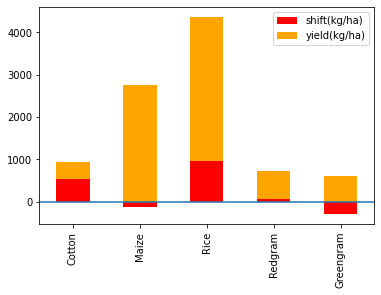

In [ ]:
dfp = pd.DataFrame({'shift(kg/ha)': shift,
                   'yield(kg/ha)': y}, index=c)

ax = dfp.plot.bar(stacked=True,color={"yield(kg/ha)": "orange", "shift(kg/ha)": "red"})

x_coordinates = [100, -10]
y_coordinates = [0, 0]

plt.plot(x_coordinates, y_coordinates)

### **MARKET PRICE**

In [ ]:
price = pd.read_csv("/content/drive/My Drive/IDW Hackthn/data/market.csv")
price.head()

,crop,variety,location,arrivals(qtls),Max,Min,Model,Purchase by
0,Cabbage,Common,Shadnagar,12,"1,600","1,400","1,500",Private Traders
1,Carrot,Common,Shadnagar,5,"3,000","2,500","2,800",Private Traders
2,Brinjal,Common,Shadnagar,10,"1,100",800,900,Private Traders
3,Ladysfinger,Common,Shadnagar,13,"1,800","1,500","1,600",Private Traders
4,Greenchillies,Common,Shadnagar,18,"3,500","2,800","3,000",Private Traders


In [ ]:
price=pd.merge(price,res,on='crop')
price.head(50)

,crop,variety,location,arrivals(qtls),Max,Min,Model,Purchase by,Area,Yeild Kharif,Per cent shift
0,Maize,Common,Choppadandi,36,"1,465","1,451","1,465",Private Traders,2.89,2760,-4.0
1,Maize,Common,Khammam,24,"1,331","1,150","1,331",Private Traders,2.89,2760,-4.0
2,Maize,Common,Tandur,19,"1,250","1,250","1,250",Private Traders,2.89,2760,-4.0
3,Maize,Common,Warangal,17,"1,472","1,452","1,462",Private Traders,2.89,2760,-4.0
4,Maize,Common,Nagarkurnool,8,"1,161","1,161","1,161",Private Traders,2.89,2760,-4.0
5,Maize,Common,Warangal,24,"1,471","1,436","1,459",Private Traders,2.89,2760,-4.0
6,Maize,Common,Tandur,20,"1,350","1,350","1,350",Private Traders,2.89,2760,-4.0
7,Maize,Common,Choppadandi,16,"1,382","1,382","1,382",Private Traders,2.89,2760,-4.0
8,Maize,Common,Tirmalagiri,6,"1,292","1,292","1,292",Private Traders,2.89,2760,-4.0
9,Maize,Common,Sadasivapet,4,"1,341","1,341","1,341",Private Traders,2.89,2760,-4.0


In [106]:
import plotly.graph_objects as go

years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
         2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

fig = go.Figure()
fig.add_trace(go.Bar(x=c,
                y=y,
                name='Yield (kg/ha)',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=c,
                y=shift,
                name='Shift (kg/ha)',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Showing crop yield with sucessive deviation',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()